In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset using the full path
file_path = r'C:\Users\kanch\OneDrive\Desktop\internship projects\netflix1.csv'
df = pd.read_csv(file_path)

# Check the first few rows
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [2]:
# 1. Fill missing values in 'director' and 'country'
df['director'] = df['director'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# 2. Convert 'date_added' to datetime safely
if df['date_added'].dtype == 'object':
    df['date_added'] = pd.to_datetime(df['date_added'].str.strip())

# 3. Create 'year_added' column
df['year_added'] = df['date_added'].dt.year

# 4. Drop any remaining rows with missing critical values (like rating)
df.dropna(subset=['rating', 'date_added'], inplace=True)

print("Data Cleaning Completed.")

Data Cleaning Completed.


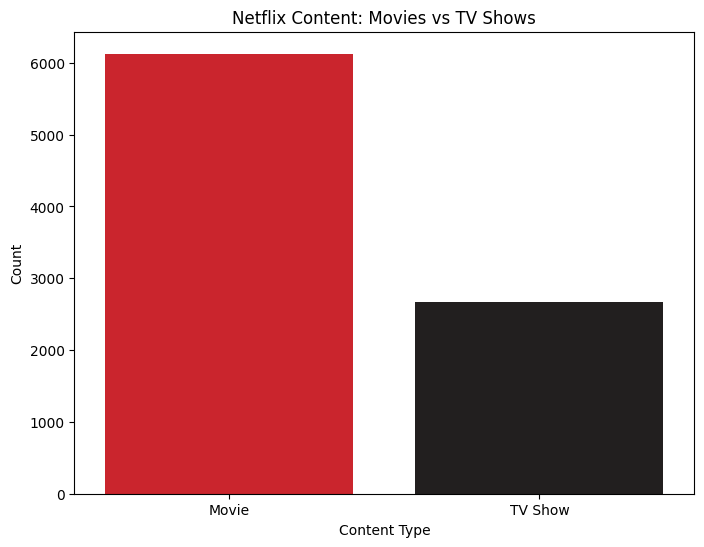

In [3]:
plt.figure(figsize=(8,6))
# Using 'hue' and 'legend=False' to satisfy latest Seaborn requirements
sns.countplot(x='type', data=df, hue='type', palette=['#E50914', '#221F1F'], legend=False)
plt.title('Netflix Content: Movies vs TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

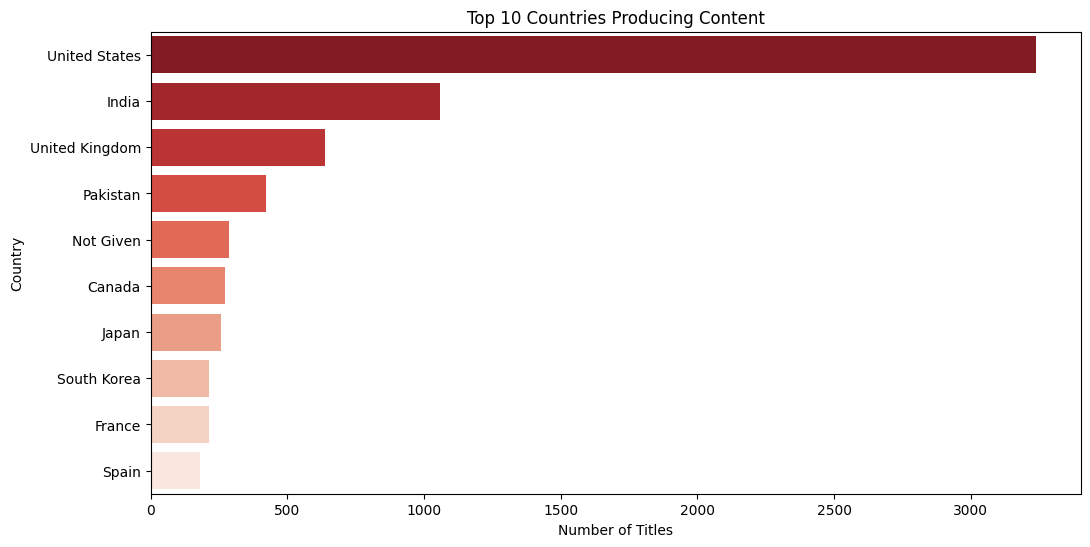

In [4]:
plt.figure(figsize=(12,6))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='Reds_r', legend=False)
plt.title('Top 10 Countries Producing Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

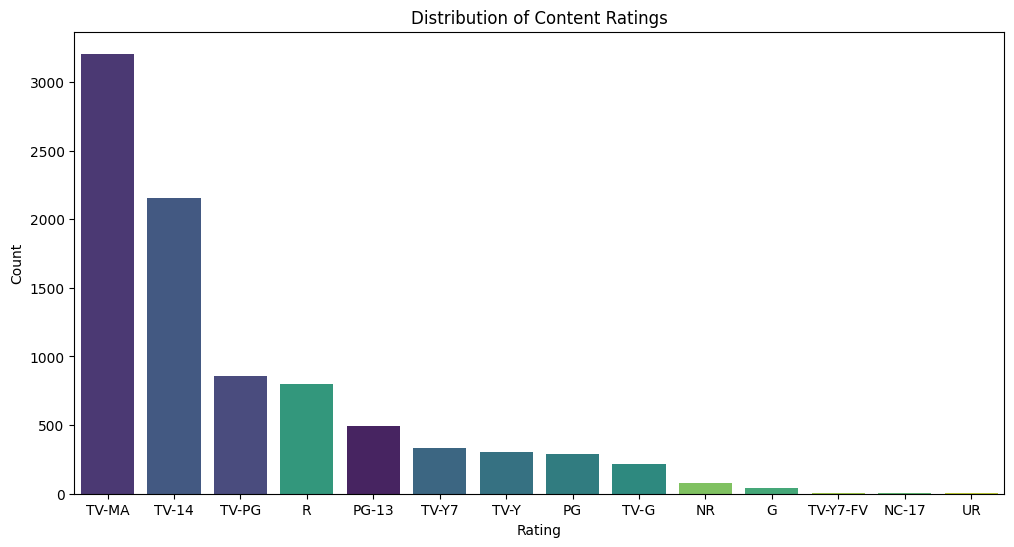

In [5]:
plt.figure(figsize=(12,6))
rating_order = df['rating'].value_counts().index
sns.countplot(x='rating', data=df, order=rating_order, hue='rating', palette='viridis', legend=False)
plt.title('Distribution of Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()